#### clean_ML_info_500.csv 크롤링 데이터 항목 분리 & 저장

* 지원 조건 
	- 경력, 학력, 스킬, 핵심역량

* 근무 조건
	- 고용형태

* 기업 정보
	- 산업(업종), 기업형태

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

from konlpy.tag import Okt
from wordcloud import WordCloud

import numpy as np
from PIL import Image


In [5]:
# DF 로드
raw = pd.read_csv('final_clean_ML_info_500.csv', encoding='utf-8-sig')
print(raw.iloc[0])

comp_name                                                   현대자동차㈜
link             https://www.jobkorea.co.kr/Recruit/GI_Read/451...
apply_require    경일력 경력 .학일력 학력무관 .핵심역량 계획성, 성실성, 꼼꼼함 .우대 기본우일대...
condition                       고용형태 정규직 급여 회사내규에 따름 지역 서울시 서초구 지도
comp_info        산업(업종) 승용차 및 기타 여객용 자동차 제조업 사원수 73,500명 설립년도 1...
Name: 0, dtype: object


#### 지원 조건 
	- 경력, 학력, 스킬, 핵심역량

In [6]:
data_dict = {}
columns = ['경력','학력','핵심역량', '스킬']

require = raw['apply_require'].to_list()
print(require[0])
print(require[0].split())

경일력 경력 .학일력 학력무관 .핵심역량 계획성, 성실성, 꼼꼼함 .우대 기본우일대 장애인
['경일력', '경력', '.학일력', '학력무관', '.핵심역량', '계획성,', '성실성,', '꼼꼼함', '.우대', '기본우일대', '장애인']


In [ ]:
tot_tmp_list = []
# print(tmp_list)

In [47]:
def clean_string(s):
    # 줄바꿈(\n, \r) 제거
    s = s.replace('\n', ' ').replace('\r', ' ')
    # 두 칸 이상의 공백을 하나의 공백으로 변경
    s = re.sub(r'\s{2,}', ' ', s)
    # "," 제거
    s = s.replace(",","")
    # 문자열 양쪽의 공백 제거
    return s.strip()

In [7]:
import re
import numpy as np

In [8]:
def extract(text):
	patterns ={
		"경력" : r"경일력\s*([^·.]+)",
		"학력" : r"학일력\s*([^.]+)",
		"스킬" : r"스킬\s*([^.]+)",
		"핵심역량": r"핵심역량\s*([^.]+)",
		"우대" : r"우대\s*([^.]+)"
	}

	result={}

	for k, v in patterns.items():
		match = re.search(v, text)
		if match:
			result[k] = match.group(1).strip()

	return result

period = [np.nan]*len(require)					# 경력
degree = [np.nan]*len(require)					# 학력
utility = [np.nan]*len(require)					# 역량
skill = [np.nan]*len(require)					# 스킬

for idx, r in enumerate(require):
	# print(extract(r))
	sss = extract(r)
	
	if '경력' in sss.keys():
		period[idx] = sss['경력']

	if '학력' in sss.keys():
		degree[idx] = sss['학력']

	if '핵심역량' in sss.keys():
		utility[idx] = sss['핵심역량']

	if '스킬' in sss.keys():
		skill[idx] = sss['스킬']

print(period[100:105])
print(degree[100:105])
print(utility[100:105])
print(skill[100:105])

{'경력': '경력', '학력': '학력무관', '핵심역량': '계획성, 성실성, 꼼꼼함', '우대': '기본우일대 장애인'}
{'경력': '경력 직무에 따라 상이', '학력': '학력무관', '핵심역량': '성실성, 성취지향성, 계획성'}
{'경력': '신입', '학력': '학력무관 교육별 상이', '스킬': 'Hadoop, JAVA, Python, Tensorflow, Tableau, ERP, MES, PLC'}
{'경력': '경력 (3년이상)', '학력': '대졸이상', '스킬': 'API, AWS, GCP, kubernetes, Python, Go', '핵심역량': '계획성, 성취지향성, 꼼꼼함'}
{'경력': '신입', '학력': '학력무관', '스킬': 'ASP, API, ASP'}
{'경력': '신입', '학력': '학력무관', '스킬': ''}
{'경력': '경력 (4년이상)', '학력': '대졸이상', '스킬': 'Pytorch, Tensorflow, Linux, CAD, BSP, MCU, Micom, RTOS', '핵심역량': '계획성, 성취지향성, 꼼꼼함', '우대': '기본우일대 관련 학과 전공자'}
{'경력': '신입', '학력': '학력무관', '핵심역량': '계획성, 성실성, 꼼꼼함'}
{'경력': '경력 (1년이상)', '학력': '학력무관', '핵심역량': '계획성, 성취지향성, 꼼꼼함', '우대': '기본우일대 장애인'}
{'경력': '신입', '학력': '학력무관'}
{'경력': '경력 (5년이상)', '학력': '학력무관'}
{'경력': '경력 직무별 상이', '학력': '대졸이상 (ICT본부 고졸 이상)', '핵심역량': '계획성, 성실성, 꼼꼼함', '우대': '기본우일대 장애인'}
{'경력': '경력 (10년이상)', '학력': '초대졸이상', '스킬': 'AWS, Hadoop, JAVA, Javascript, Kafka, Kotlin, OpenGL, Scala, Swift, Spring Framework'}
{'경력'

In [10]:
##

apply_500_DF = pd.DataFrame( {'기업명': raw['comp_name'].to_list(), '경력':period, '학력':degree, '핵심역량':utility, '스킬':skill})
apply_500_DF.head(5)

,기업명,경력,학력,핵심역량,스킬
0,현대자동차㈜,경력,학력무관,"계획성, 성실성, 꼼꼼함",NaN
1,㈜아이엠뱅크,경력 직무에 따라 상이,학력무관,"성실성, 성취지향성, 계획성",NaN
2,㈜세종교육,신입,학력무관 교육별 상이,NaN,"Hadoop, JAVA, Python, Tensorflow, Tableau, ERP..."
3,GS리테일,경력 (3년이상),대졸이상,"계획성, 성취지향성, 꼼꼼함","API, AWS, GCP, kubernetes, Python, Go"
4,(주)우아한형제들,신입,학력무관,NaN,"ASP, API, ASP"


In [13]:
# 저장
apply_500_DF.to_csv('apply_info_500.csv', index=False, encoding='utf-8-sig')
# apply_500_DF.to_excel('apply_info_500_excel.excel',index=False)

#### 핵심역량 & 스킬 워드클라우드

In [30]:
# 내용 .txt 파일로 저장

# apply_500_DF['스킬'][~apply_500_DF['스킬'].isna()].to_list()
# apply_500_DF['스킬'][~apply_500_DF['스킬'].isna()].to_list()

['Hadoop, JAVA, Python, Tensorflow, Tableau, ERP, MES, PLC',
 'API, AWS, GCP, kubernetes, Python, Go',
 'ASP, API, ASP',
 '',
 'Pytorch, Tensorflow, Linux, CAD, BSP, MCU, Micom, RTOS',
 'AWS, Hadoop, JAVA, Javascript, Kafka, Kotlin, OpenGL, Scala, Swift, Spring Framework',
 'Ai, LLM',
 'AWS, Azure, GCP, MySQL, NoSQL, SQL, Tensorflow, Linux',
 'JAVA, Python',
 'Ai',
 'JAVA, MySQL, Oracle, PHP, Python, Illustrator, Photoshop, 파이널컷, 프리미어, 영어',
 '무선설비기사 자격, 운전면허, 전자기기기능사 자격, 정보기기운용기능사 자격, 정보보안기사 자격, 정보처리기능사 자격, 정보처리기사 자격, 정보처리산업기사 자격, 정보통신기사 자격, 토목기사 자격, 토목산업기사 자격',
 'AWS, Git, GraphQL, Keras, MariaDB, MongoDB, Node',
 'API, JAVA, Python',
 'Docker, Hadoop, JAVA, Kafka, kubernetes, PostgreSQL, Python, Spark',
 'MSSQL, Python, SQL',
 'AWS, Python, Pytorch, Tensorflow, AWS EKS',
 'C, C#, C++, HTML, iOS, JAVA, Javascript, Window, Linux, Cloud',
 'C#, C++, MSSQL, OpenCV, Oracle, Pytorch, CIM, RTD, mcs',
 'C, C#, C++, Visual Studio, VIsualC·C++, C++Builder',
 '',
 'Python, Pytorch, RestAPI, Ten

In [50]:
# "'", "," 삭제

skill_list = apply_500_DF['스킬'][~apply_500_DF['스킬'].isna()].to_list()

with open ("skill_final_text.txt","w") as f:
	
	for skill in skill_list:
		f.write(clean_string(skill))

    # skill_list[idx] = skill.replace(",","").replace("'","")

In [71]:
utility_list = apply_500_DF['핵심역량'][~apply_500_DF['핵심역량'].isna()].to_list()

with open ("utility_final_text.txt","w") as f:
	
	for utility in utility_list:
		f.write(clean_string(utility) + ' ')

{'Python': 1.0, 'Python Pytorch': 0.6986301369863014, 'C C': 0.5616438356164384, 'C': 0.4520547945205479, 'Pytorch Tensorflow': 0.3835616438356164, 'JAVA': 0.3424657534246575, 'Tensorflow': 0.3424657534246575, 'Git': 0.3150684931506849, 'SQL': 0.3013698630136986, 'OpenCV': 0.3013698630136986, 'Spring': 0.2465753424657534, 'MySQL': 0.2328767123287671, 'AWS': 0.2054794520547945, 'Linux': 0.2054794520547945, 'Docker': 0.1917808219178082, 'JAVA Javascript': 0.1780821917808219, 'MariaDB': 0.1643835616438356, 'kubernetes': 0.1506849315068493, 'React': 0.1506849315068493, 'Javascript': 0.136986301369863, 'NoSQL': 0.136986301369863, 'Keras': 0.136986301369863, 'PostgreSQL': 0.1232876712328767, 'DL': 0.1232876712328767, 'Spark': 0.1232876712328767, 'Ai': 0.1232876712328767, 'Oracle': 0.1095890410958904, 'TensorflowC': 0.1095890410958904, 'GitHub': 0.1095890410958904, 'Kafka': 0.0958904109589041, 'MongoDB': 0.0958904109589041, 'MFC': 0.0958904109589041, 'Matlab': 0.0958904109589041, 'CNN': 0.095

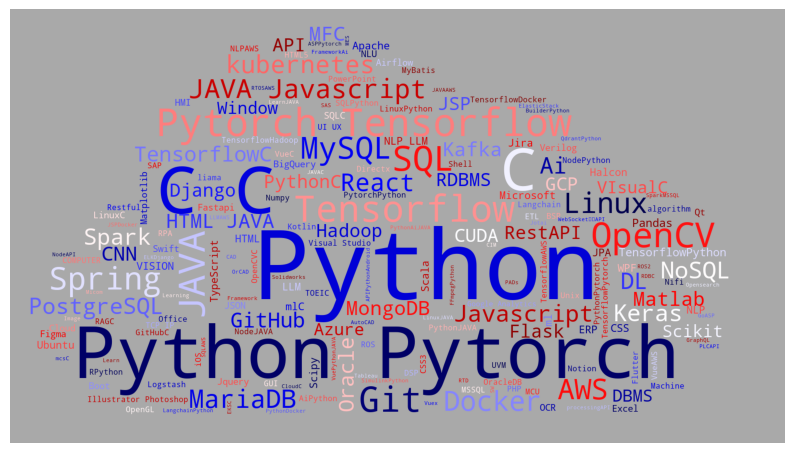

In [119]:
## 스킬 워드클라우드

# -----------------------------------------------------------
# 영문 wordCloud 생성

# 한글 내용 삭제 - skill_final_text_2.txt
# -----------------------------------------------------------

from wordcloud import STOPWORDS
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import numpy as np
from PIL import Image

# stopwords = set(STOPWORDS)
# stopwords.add("Python Pytorch")



text = open('skill_final_text_2.txt').read()


# 워드클라우드 출력 형태 이미지 마스크 설정
img_mask = np.array(Image.open('cloud.png'))


# 워드클라우드 분석 ----------------------------------------------------------
wc = WordCloud(width=400, height=400,
               background_color="darkgrey", max_font_size=200,
               stopwords=STOPWORDS,
               repeat=False,
               colormap='seismic', mask=img_mask).generate(text)

# # 딕셔너리 형태로 할당해야만!!
# cloud = wc.generate_from_frequencies(dict(tags))

# words_: 객체의 비율 정보가 담긴 딕셔너리 반환
print(wc.words_)

# 워드클라우드 결과 이미지 생성
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(wc)
plt.show()

['계획성', '성실', '성실', '성취', '지향성', '계획성', '계획성', '성취', '지향성', '계획성', '성취', '지향성', '계획성', '성실', '계획성', '성취', '지향성', '계획성', '성실', '계획성', '성실', '계획성', '성취', '지향성', '창의성', '성장', '지향성', '성실', '협동', '심', '계획성', '성실', '적응', '창의성', '협동', '심', '계획성', '성실', '협동', '심', '메타', '성취', '지향성', '성실', '협동', '심', '계획성', '성실', '성실', '성취', '지향성', '스트레스', '관리', '성장', '지향성', '계획성', '윤리', '의식', '자존감', '적응', '창의성', '협동', '심', '계획성', '성취', '지향성', '성취', '지향성', '메타', '성실', '창의성', '계획성', '성실', '계획성', '성실', '성실', '윤리', '의식', '협동', '심', '성장', '지향성', '성취', '지향성', '계획성', '성실', '협동', '심', '적응', '창의성', '창의성', '협동', '심', '성장', '지향성', '성실', '자존감', '적응', '성실', '성취', '지향성', '협동', '심', '성장', '지향성', '적응', '협동', '심', '계획성', '성장', '지향성', '성실', '성취', '지향성', '성장', '지향성', '성실', '성취', '지향성', '계획성', '창의성', '성장', '지향성', '협동', '심', '적응', '성실', '성취', '지향성', '창의성', '협동', '심', '성장', '지향성', '계획성', '메타', '스트레스', '관리', '윤리', '의식', '자존감', '적응', '스트레스', '관리', '적응', '성장', '지향성', '성실', '창의성', '협동', '심', '계획성', '성실', '성취', '지향성', '성실', '윤리', '의식', 

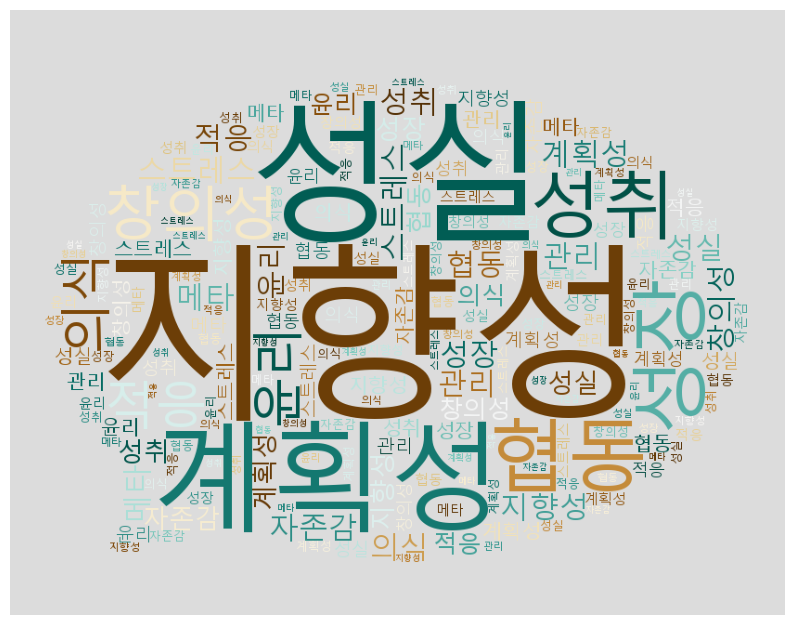

In [168]:
# 핵심역량 워드클라우드

# -----------------------------------------------------------
# 단어 분석 및 wordCloud 생성
# -----------------------------------------------------------

from konlpy.tag import Okt
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import platform

import numpy as np
from PIL import Image

okt = Okt() # Open Korean Text 객체 생성

text = open('utility_final_text.txt', encoding='utf-8').read()


# okt() 함수로 형태소 분석
sentences_tag = []
sentences_tag = okt.pos(text)

# tag가 명사 or 형용사인 단어들만 할당
noun_list = []
for word, tag in sentences_tag:
    if tag in ['Noun']:
        noun_list.append(word)

print(noun_list)

# 가장 많이 나온 단어 TOP 50 
counts = Counter(noun_list)
tags = counts.most_common(20)           # -> Counter(리스트) --> 리스트 항목의 각 개수를 Dict 반환
print(tags)                             # -> most_common(n) -->  빈도 수가 높은 상위 n개 반환        

stopwords= '심'

# tags.pop(stopwords)
tags.pop(4)

print(tags)

# 한글 분석 위한 font 한글로 지정
if platform.system() == 'Windows':
    path = r'c:\Windows\Fonts\malgun.ttf'


# 워드클라우드 출력 형태 이미지 마스크 설정
img_mask = np.array(Image.open('balloon.png'))

# 워드클라우드 분석 ----------------------------------------------------------
wc = WordCloud(font_path=path, width=400, height=400,
               background_color="gainsboro", max_font_size=200,
               repeat=True,
               colormap='BrBG', mask=img_mask)

# 딕셔너리 형태로 할당해야만!!
cloud = wc.generate_from_frequencies(dict(tags))

# 워드클라우드 결과 이미지 생성
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

##### 경력 막대그래프

In [78]:
apply_500_DF.groupby('경력').count().reset_index()

,경력,기업명,학력,핵심역량,스킬
0,경력,156,143,40,82
1,경력 (10년이상),6,6,1,5
2,경력 (1년이상),18,18,3,17
3,경력 (1년이상) 직무 별 상이,1,1,0,1
4,경력 (2년이상),34,34,6,24
5,경력 (3년이상),91,91,18,59
6,경력 (4년이상),7,7,2,3
7,경력 (5년이상),48,48,9,31
8,경력 (6년이상),5,5,1,4
9,경력 (7년이상),6,6,2,6


In [82]:
period_count = apply_500_DF.groupby('경력').count().reset_index()
period_count.loc[0:13]['기업명'].sum()

381

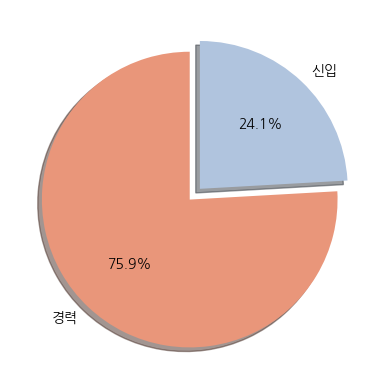

In [145]:
xx = ['신입','경력']
yy = [121, period_count.loc[0:13]['기업명'].sum()]

colors = plt.cm.tab20.colors

plt.pie(yy, labels=xx, autopct='%.1f%%', startangle=90, counterclock=False,explode=[0.05, 0.05],
        colors=['lightsteelblue','darksalmon'], shadow=True)
plt.show()

In [105]:
apply_500_DF['경력'].value_counts()

경력
경력                   156
신입                   121
경력 (3년이상)             91
경력 (5년이상)             48
경력 (2년이상)             34
경력 (1년이상)             18
경력 (4년이상)              7
경력 (10년이상)             6
경력 (7년이상)              6
경력 (6년이상)              5
경력 (8년이상)              5
경력 직무별 상이              2
경력 직무에 따라 상이           1
경력 (1년이상) 직무 별 상이      1
경력 6년이상                1
Name: count, dtype: int64

In [104]:
apply_500_DF['경력'].value_counts().index

Index(['경력', '신입', '경력 (3년이상)', '경력 (5년이상)', '경력 (2년이상)', '경력 (1년이상)',
       '경력 (4년이상)', '경력 (10년이상)', '경력 (7년이상)', '경력 (6년이상)', '경력 (8년이상)',
       '경력 직무별 상이', '경력 직무에 따라 상이', '경력 (1년이상) 직무 별 상이', '경력 6년이상'],
      dtype='object', name='경력')

In [65]:
apply_500_DF['경력'].value_counts().values

array([156, 121,  91,  48,  34,  18,   7,   6,   6,   5,   5,   2,   1,
         1,   1], dtype=int64)

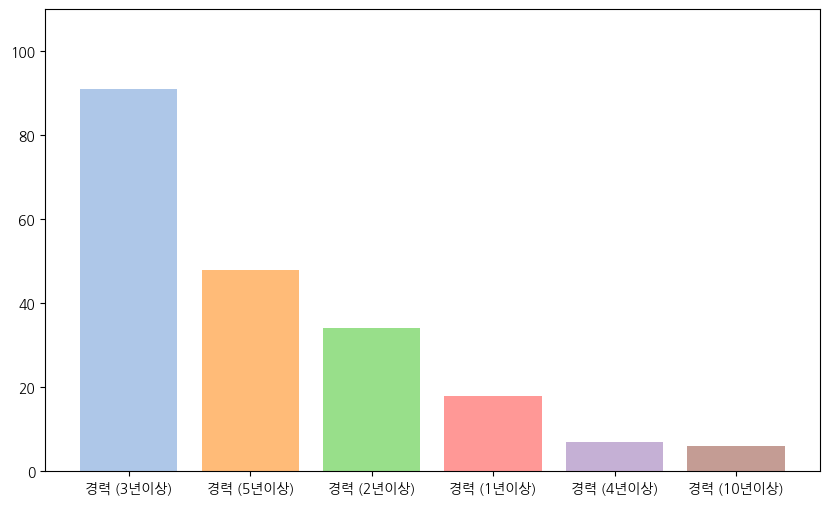

In [147]:
plt.figure(figsize=(10,6))

colors = plt.cm.tab20.colors

xxx = apply_500_DF['경력'].value_counts().index[2:8]
yyy = apply_500_DF['경력'].value_counts().values[2:8]

plt.bar(xxx,yyy, color=colors[1:-1:2])
plt.ylim(bottom=0,top=110)
plt.show()

In [106]:
apply_500_DF.groupby('학력').count().reset_index()

,학력,기업명,경력,핵심역량,스킬
0,고졸이상,3,3,0,2
1,고졸이상 (졸업예정자 가능),1,1,1,1
2,대졸이상,160,160,33,106
3,대졸이상 (ICT본부 고졸 이상),1,1,1,0
4,대졸이상 (졸업예정자 가능),41,41,13,38
5,대졸이상 직무별 상이,1,1,1,1
6,대학원(박사)이상,1,1,0,0
7,대학원(석사)이상,36,36,6,19
8,대학원(석사)이상 (졸업예정자 가능),23,23,5,9
9,초대졸이상,41,41,10,30


In [150]:
apply_500_DF['학력'].value_counts().index

Index(['학력무관', '대졸이상', '초대졸이상', '대졸이상 (졸업예정자 가능)', '대학원(석사)이상',
       '대학원(석사)이상 (졸업예정자 가능)', '초대졸이상 (졸업예정자 가능)', '고졸이상', '학력무관 교육별 상이',
       '대졸이상 (ICT본부 고졸 이상)', '대졸이상 직무별 상이', '대학원(박사)이상', '고졸이상 (졸업예정자 가능)'],
      dtype='object', name='학력')

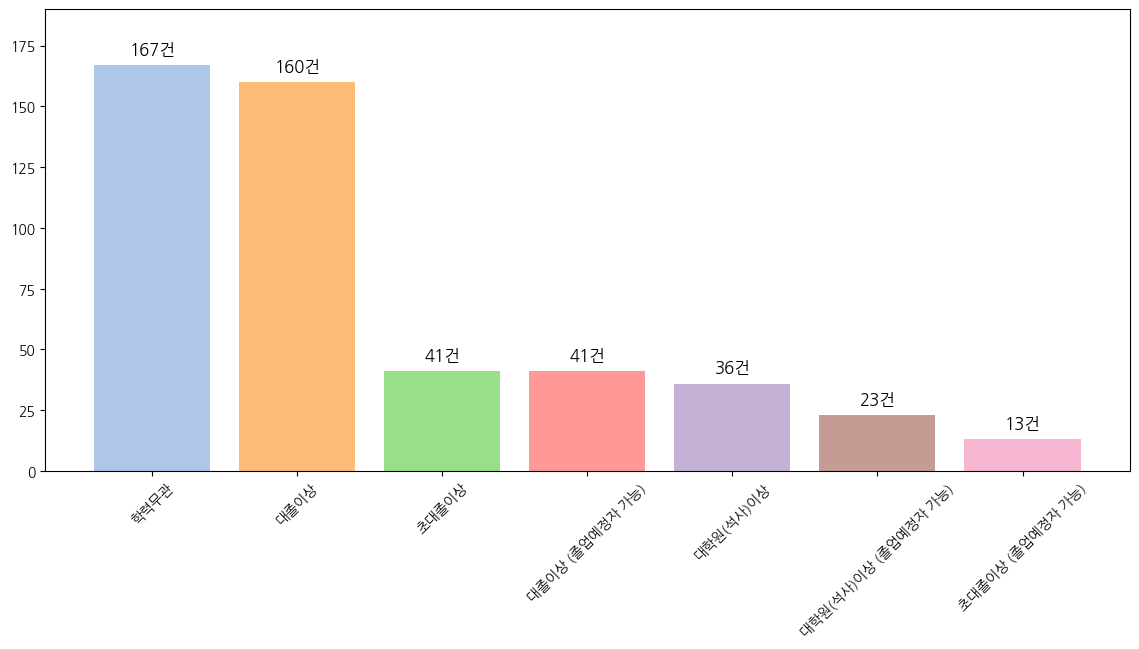

In [159]:
plt.figure(figsize=(14,6))

colors = plt.cm.tab20.colors

xxx = apply_500_DF['학력'].value_counts().index[0:7]
yyy = apply_500_DF['학력'].value_counts().values[0:7]

bar1=plt.bar(xxx,yyy, color=colors[1:-1:2])

plt.bar_label(bar1, fmt ='{:,.0f}건', label_type='edge', padding=6, fontsize=12)

plt.xticks(rotation=45)
plt.ylim(bottom=0,top=190)
plt.show()

In [ ]:
exceptlist = []
successlist = []
try:
	

	successlist.append(require[idx])

except Exception as e:
    print('실패', require[idx])
    exceptlist.append(require[idx])

In [ ]:
require[0]

In [ ]:
for idx in range(len(require)):
	
	print(idx+1)
	columns = ['경력','학력','핵심역량', '스킬']
	tmp_list = [''] * len(columns)
	idx_list=[]

	datass = require[idx]
	print(datass)

	# 경력 추가
	point_1 = datass.index('경력',0,len(datass))
	# 학력 있을 시
	if '학력' in datass:
		point_2 = datass.index('학력')
		tmp_list[0] = datass[point_1+1:point_2]


	# 학력 추가
	if '학력' in datass:
		point_2 = datass.index('학력')
		tmp_list[1] = datass[point_2+1]

	# 핵심역량 추가
	if '핵심역량' in datass:
		point_3 = datass.index('핵심역량')
		tmp_list[2] = datass[point_3+1]

	# 스킬 추가
	if '스킬' in datass:
		point_4 = datass.index('스킬')
		tmp_list[3] = datass[point_4+1]

	print(tmp_list)
	
	tot_tmp_list.append(tmp_list)

# print(tot_tmp_list[:10])

In [ ]:
for idx in range(len(require)):
print(idx+1)
	tmp_list = [''] * len(columns)
	idx_list=[]

	datass = require[idx]

	point_1 = datass.find(columns[0])	# 경력	시작 인덱스			# 없으면 -1 반환
	point_2 = datass.find(columns[1])	# 학력	시작 인덱스
	point_3 = datass.find(columns[2])	# 핵심역량 시작 인덱스
	point_4 = datass.find(columns[3])	# 스킬 	시작 인덱스

	print(point_1,point_2, point_3, point_4)

	# 경력 추가
	tmp_list[0] = datass[point_1+3:point_2].strip()
	print(tmp_list)
	
	# 학력
	if (point_2 != -1) and (point_3 !=-1):
		tmp_list[1] = datass[point_2+3:point_3].strip()

	if (point_2 != -1) and (point_3 ==-1) and (point_4 !=-1):
		tmp_list[1] = datass[point_2+3:point_4].strip()

	if (point_2 != -1) and (point_3 ==-1) and (point_4 ==-1):
		tmp_list[1] = datass[point_2+3:].strip()
	

	# 핵심역량
	if ((point_3 != -1) and (point_4 !=-1)) and (point_3*point_4 > 0):
		tmp_list[2] = datass[point_3+5:point_4]

	# 스킬
	if point_4 != -1:
		tmp_list[3] = datass[point_4+3]
	
	tot_tmp_list.append(tmp_list)

print(tot_tmp_list[:10])